# **Importación de librerias**

In [1]:
!pip install funpymodeling
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 215 kB 4.7 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7b821fe3b2bae7db43305d0b6d10dd6d20f58ca9b2b9ab44689d0c9998b39651
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 1.10.2 requires 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importación de librerias necesarias para manipulación y exploración de datos
# ========================================================
import pandas as pd
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# ========================================================

# **Apertura del CSV**

In [4]:
# Apertura del csv final
# Variables
# path_csv: Donde esta ubicado el archivo csv con todos los cruces
# ==================================================================================================
path_csv='/content/drive/MyDrive/Codigo_Final/Data_2015-2022.csv'
df= pd.read_csv(path_csv, encoding='windows-1252')
# ==================================================================================================

## Preparación de la tabla o arreglo del dataset

In [5]:
# Cambio de nombre de las columnas
df.columns=['CodigoEstacion',	'CodigoSensor',	'FechaObservacion', 'Dia', 'Mes', 'Anio', 'Fecha', 'Hora',	'Humedad',
            'Humedad_UnidadMedida',	'Precipitacion',	'Precipitacion_UnidadMedida',	'PresionAtmosferica',	
            'PresionAtmosferica_UnidadMedida', 'Temperatura',	'Temperatura_UnidadMedida',
            'NombreEstacion',	'Departamento',	'Municipio',	'ZonaHidrografica',	'Latitud',	'Longitud']

In [6]:
# Tipo de datos en el dataset
df.dtypes

CodigoEstacion                       int64
CodigoSensor                         int64
FechaObservacion                    object
Dia                                  int64
Mes                                  int64
Anio                                 int64
Fecha                               object
Hora                                 int64
Humedad                            float64
Humedad_UnidadMedida                object
Precipitacion                      float64
Precipitacion_UnidadMedida          object
PresionAtmosferica                 float64
PresionAtmosferica_UnidadMedida     object
Temperatura                        float64
Temperatura_UnidadMedida            object
NombreEstacion                      object
Departamento                        object
Municipio                           object
ZonaHidrografica                    object
Latitud                            float64
Longitud                           float64
dtype: object

In [7]:
# Se trasforma la columna Fecha a Datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%m/%d/%Y")

In [8]:
# Se obtiene el numero de dia que corresponde al año
df['Dia'] = pd.to_datetime(df['Fecha']).dt.strftime("%j")
df['Dia'] = df['Dia'].astype('int')

# Se pone la columna Dia en la 5 posición 
columna_Almacenada = df.pop('Dia') 
df.insert(5, 'Dia', columna_Almacenada) 

In [9]:
# Se organiza el Dataframe con respecto a las fechas
df=df.sort_values(by='FechaObservacion') 

In [10]:
df.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,Mes,Anio,Dia,Fecha,Hora,Humedad,Humedad_UnidadMedida,...,PresionAtmosferica,PresionAtmosferica_UnidadMedida,Temperatura,Temperatura_UnidadMedida,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
37735,21205012,27,1/1/2015 0:00,1,2015,1,2015-01-01,0,91.0,%,...,754.3,HPa,8.4,°C,UNIVERSIDAD NACIONAL - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.638083,-74.089083
88203,21206960,27,1/1/2015 0:00,1,2015,1,2015-01-01,0,67.0,%,...,746.6,HPa,11.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667
88213,21206960,27,1/1/2015 10:00,1,2015,1,2015-01-01,10,31.0,%,...,747.1,HPa,17.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667
37745,21205012,27,1/1/2015 10:00,1,2015,1,2015-01-01,10,41.0,%,...,751.9,HPa,17.8,°C,UNIVERSIDAD NACIONAL - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.638083,-74.089083
88214,21206960,27,1/1/2015 11:00,1,2015,1,2015-01-01,11,36.0,%,...,746.5,HPa,18.2,°C,IDEAM BOGOTA - AUT,BOGOTA,BOGOTA D.C,ALTO MAGDALENA,4.600000,-74.066667


# **Entendimiento de la data**

In [11]:
# Estadisticas del dataset
df.describe()

,CodigoEstacion,CodigoSensor,Mes,Anio,Dia,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
count,1.432820e+05,143282.0,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000,143282.000000
mean,2.120594e+07,27.0,6.470596,2018.385471,181.445701,11.449742,73.503153,0.016441,748.112469,14.950512,4.631674,-74.084043
std,8.468699e+02,0.0,3.387249,2.174920,103.427014,6.909338,16.146659,0.135463,18.009332,3.270078,0.027814,0.014709
min,2.120501e+07,27.0,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,600.100000,0.000000,4.600000,-74.102667
25%,2.120501e+07,27.0,4.000000,2017.000000,92.000000,5.000000,61.000000,0.000000,746.900000,12.700000,4.600000,-74.102667
50%,2.120571e+07,27.0,6.000000,2018.000000,181.000000,11.000000,73.500000,0.000000,751.200000,14.500000,4.638083,-74.089083
75%,2.120696e+07,27.0,9.000000,2020.000000,269.000000,17.000000,86.300000,0.000000,753.100000,17.300000,4.669333,-74.066667
max,2.120696e+07,27.0,12.000000,2022.000000,366.000000,23.000000,100.000000,8.116667,762.800000,49.800000,4.669333,-74.066667


In [12]:
# Tamaño del dataset
df.shape

(143282, 22)

In [13]:
# ¿Qué estaciones tenemos?
estaciones=df["CodigoEstacion"].unique()
print(estaciones)

[21205012 21206960 21205710]


## **Diagramas**

## Histogramas

### Temperatura

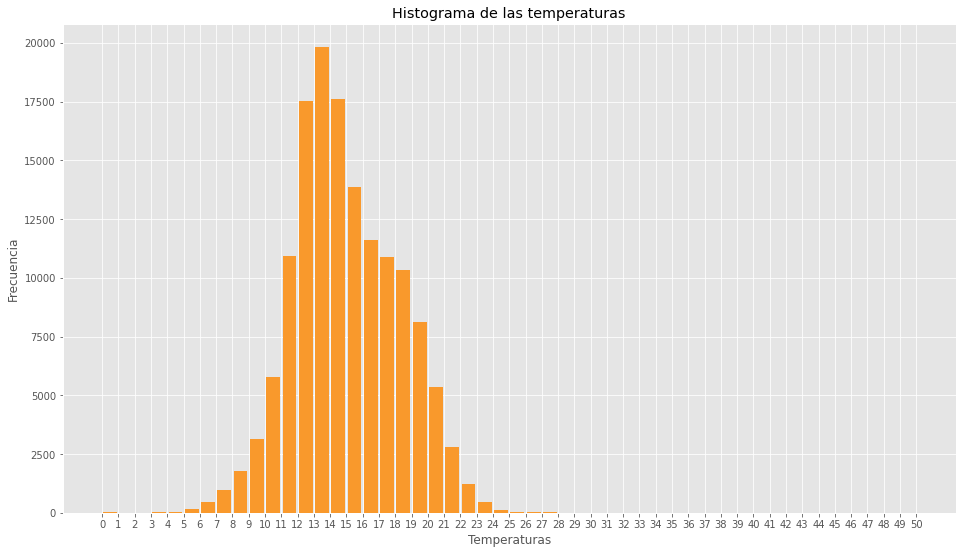

In [14]:
#Histograma de temperaturas
import matplotlib.pyplot as plot

temperaturas= df['Temperatura'].astype(int)

intervalos = range(min(temperaturas), max(temperaturas) + 2) #calculamos los extremos de los intervalos

plot.hist(x=temperaturas, bins=intervalos, color='#F9992C', rwidth=0.85)
plot.title('Histograma de las temperaturas')
plot.xlabel('Temperaturas')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

### Humedad

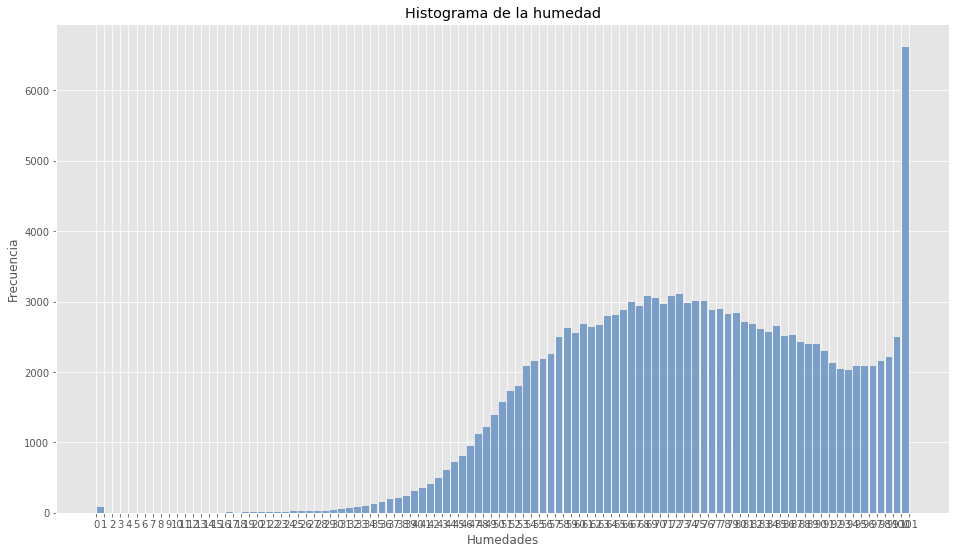

In [15]:
#Histograma de humedad
import matplotlib.pyplot as plot

temperaturas= df['Humedad'].astype(int)

intervalos = range(min(temperaturas), max(temperaturas) + 2) #calculamos los extremos de los intervalos

plot.hist(x=temperaturas, bins=intervalos, color='#799FCA', rwidth=0.85)
plot.title('Histograma de la humedad')
plot.xlabel('Humedades')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma

### Precipitación

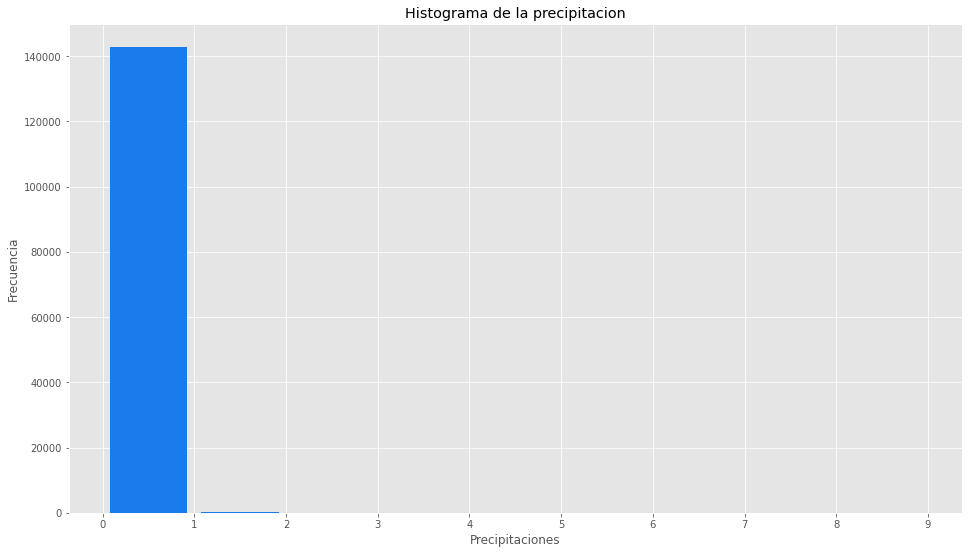

In [16]:
#Histograma de humedad
import matplotlib.pyplot as plot

temperaturas= df['Precipitacion'].astype(int)

intervalos = range(min(temperaturas), max(temperaturas) + 2) #calculamos los extremos de los intervalos

plot.hist(x=temperaturas, bins=intervalos, color='#1A7CEC', rwidth=0.85)
plot.title('Histograma de la precipitacion')
plot.xlabel('Precipitaciones')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
#	CodigoEstacion	CodigoSensor	FechaDia	FechaHora	Humedad	Precipitacion	PresionAtmosferica	Temperatura	Latitud	Longitud
plot.show() #dibujamos el histograma

### Presión Atmosferica

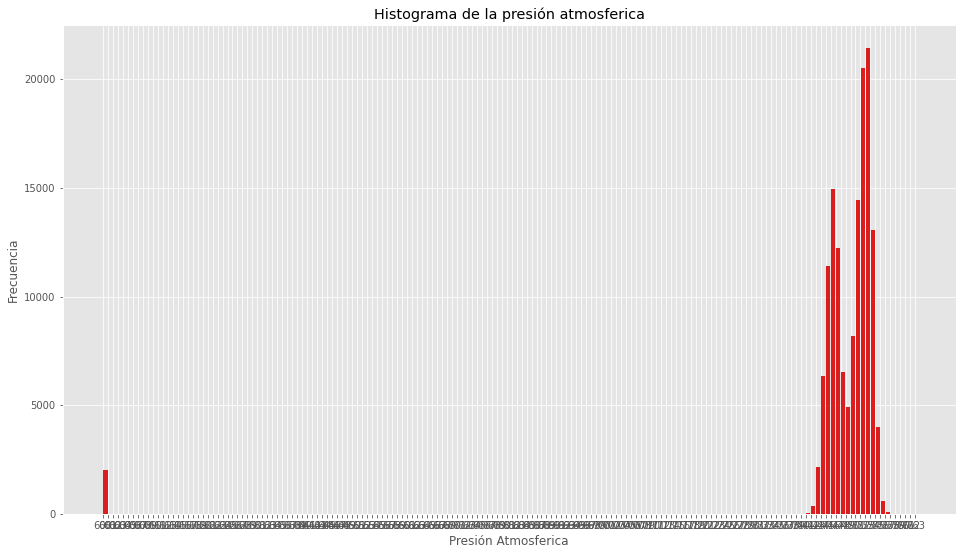

In [17]:
#Histograma de humedad
import matplotlib.pyplot as plot

temperaturas= df['PresionAtmosferica'].astype(int)

intervalos = range(min(temperaturas), max(temperaturas) + 2) #calculamos los extremos de los intervalos

plot.hist(x=temperaturas, bins=intervalos, color='#DC1D1D', rwidth=0.85)
plot.title('Histograma de la presión atmosferica')
plot.xlabel('Presión Atmosferica')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
#	CodigoEstacion	CodigoSensor	FechaDia	FechaHora	Humedad	Precipitacion	PresionAtmosferica	Temperatura	Latitud	Longitud
plot.show() #dibujamos el histograma

## Diagramas de correlación

### Diagramas por hora

#### Temperatura

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

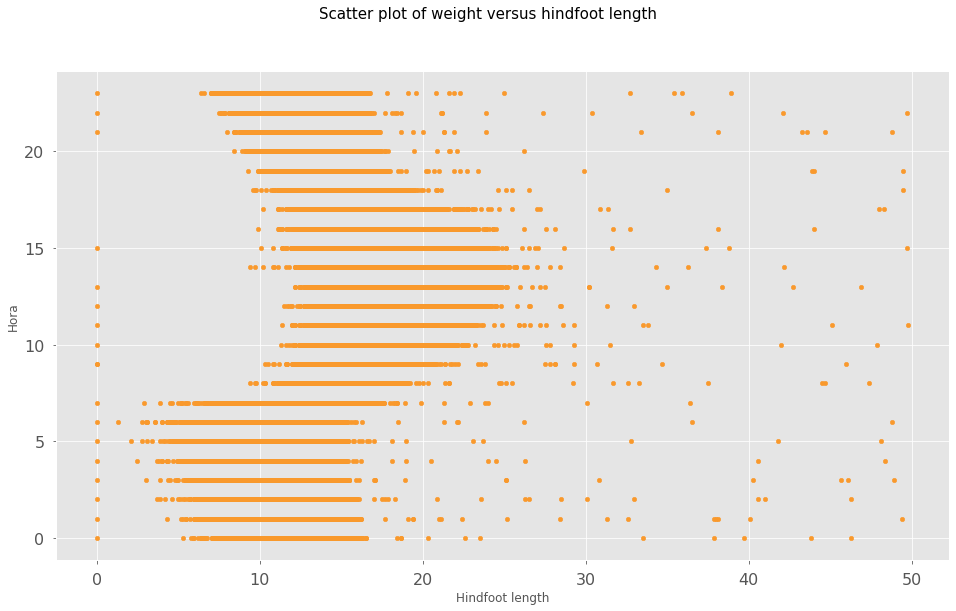

In [18]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "Hora",color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

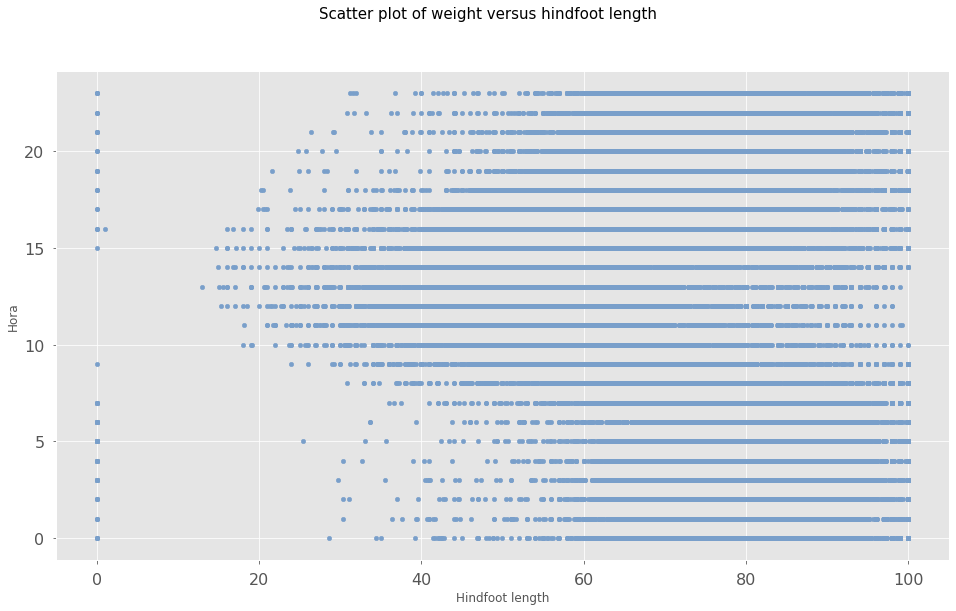

In [19]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Humedad", "Hora", color='#799FCA', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

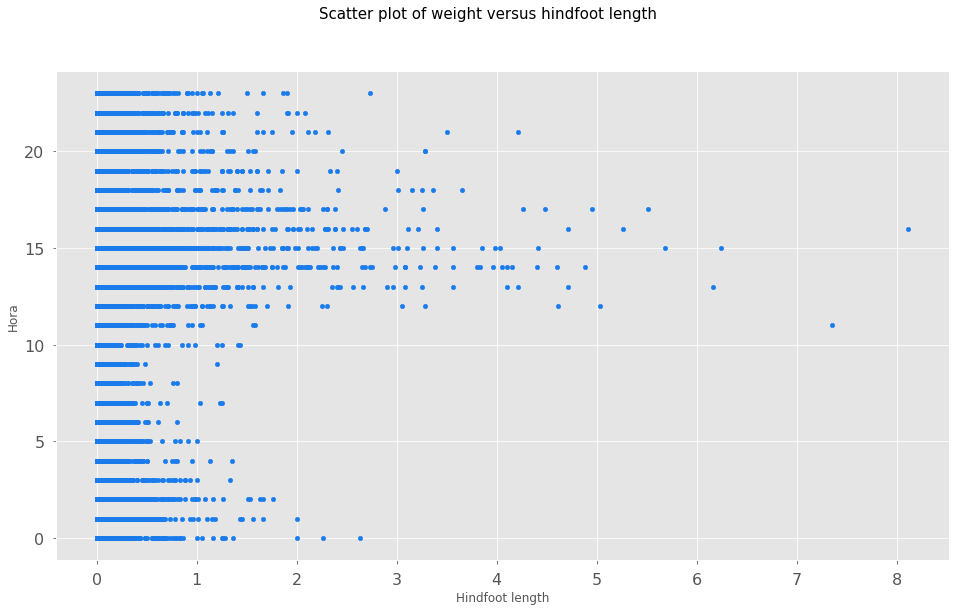

In [20]:
import seaborn as sns


fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Precipitacion", "Hora", color='#1A7CEC', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

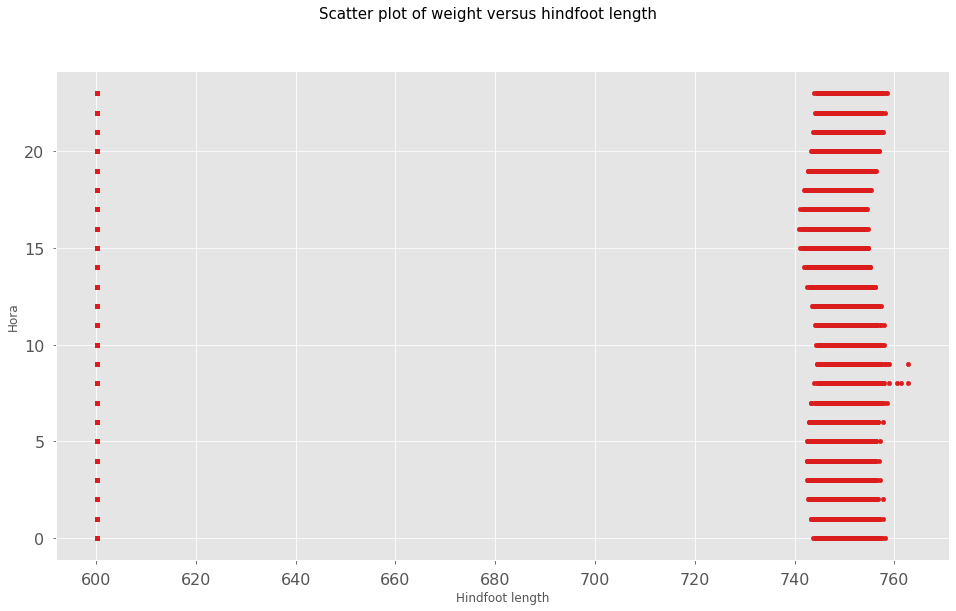

In [21]:
import seaborn as sns


fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("PresionAtmosferica", "Hora", color='#DC1D1D', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

### Diagramas por humedad


#### Temperatura

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

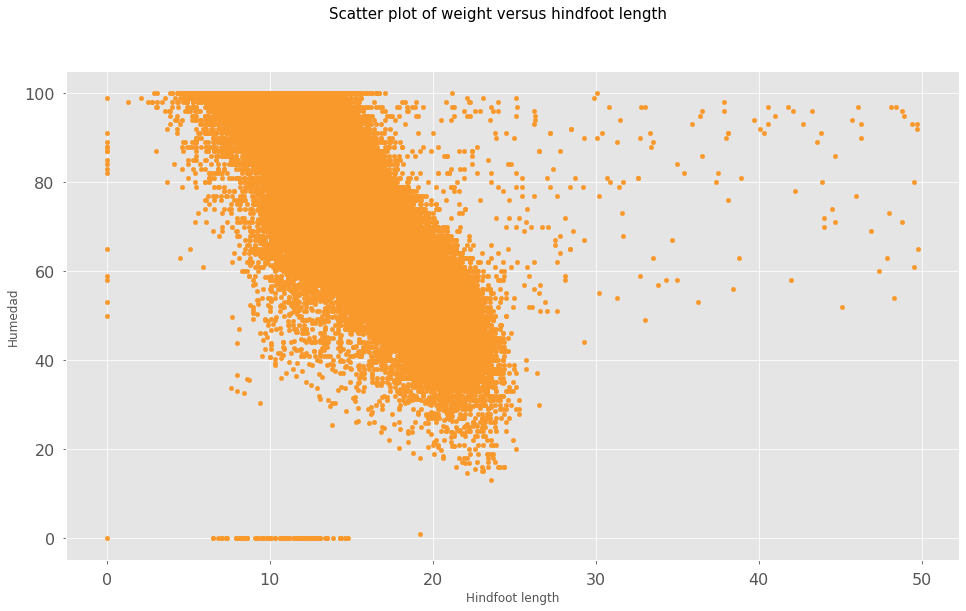

In [22]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "Humedad", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

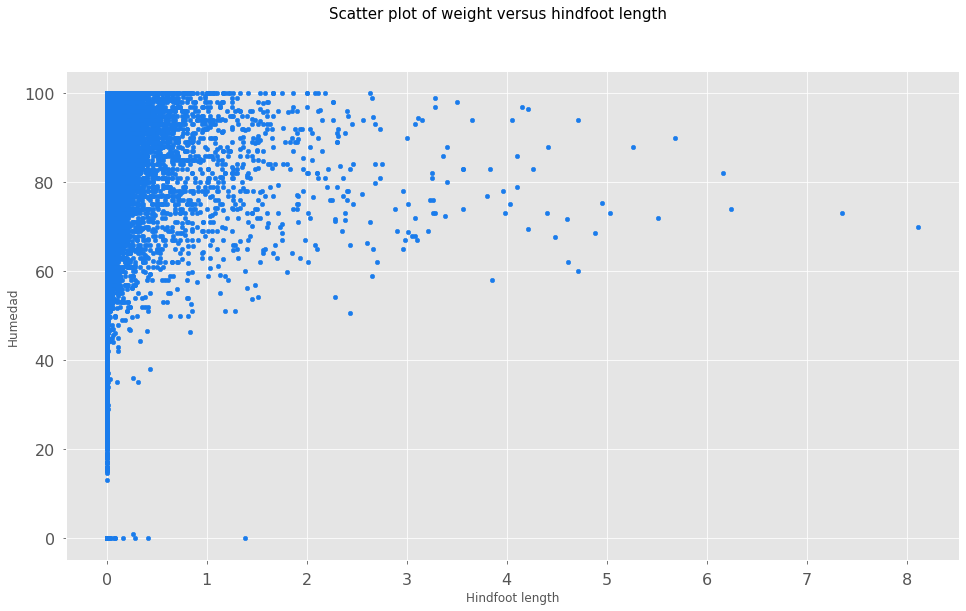

In [23]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Precipitacion", "Humedad", color='#1A7CEC', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

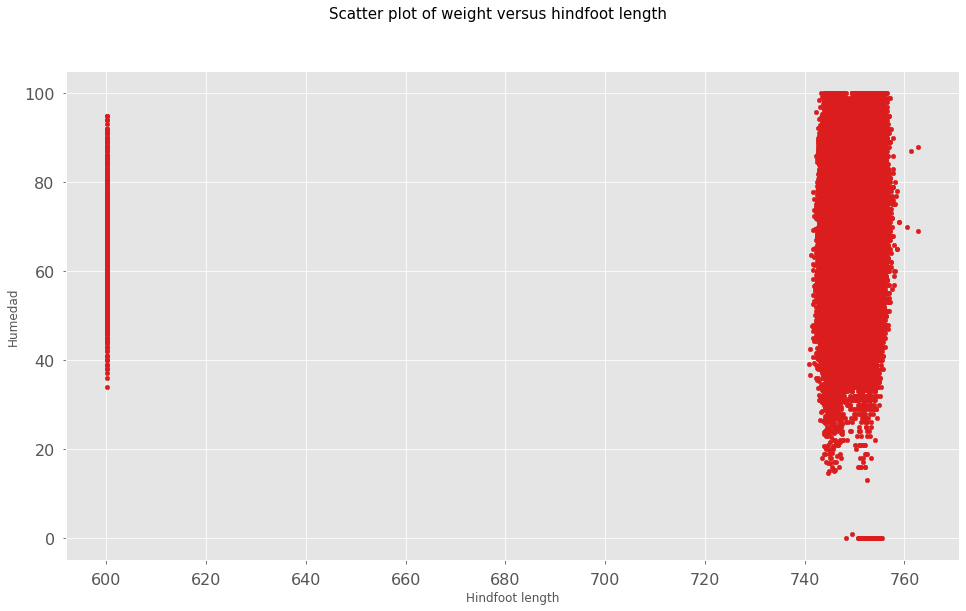

In [24]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("PresionAtmosferica", "Humedad", color='#DC1D1D', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

### Diagramas por precipitación


#### Temperatura


Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

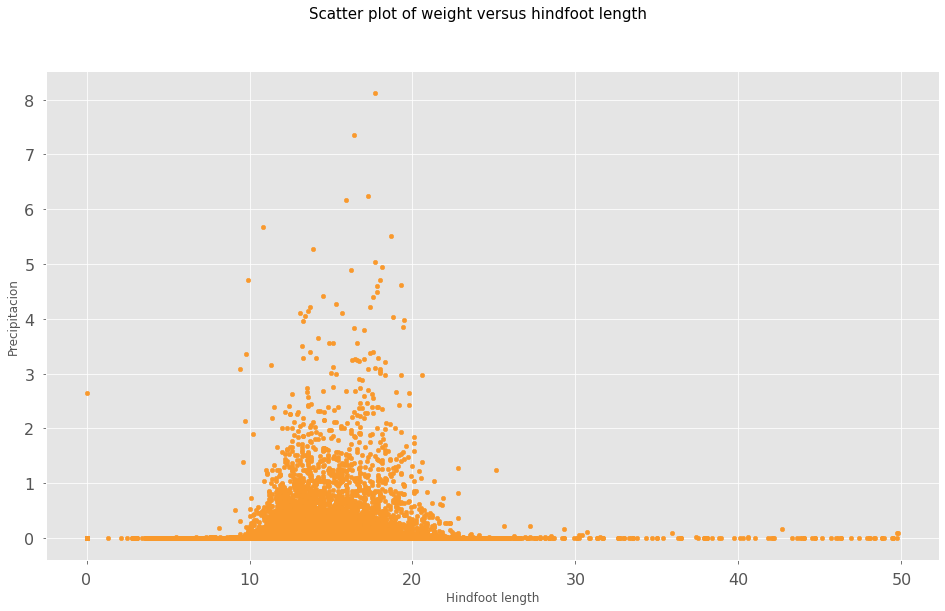

In [25]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "Precipitacion", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

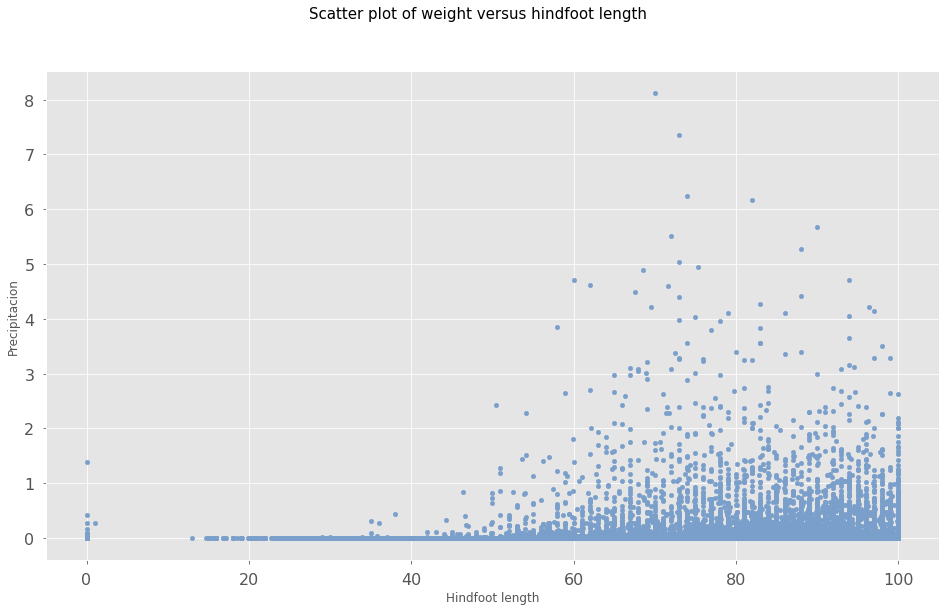

In [26]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Humedad", "Precipitacion", color='#799FCA', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Presión Atmosferica

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

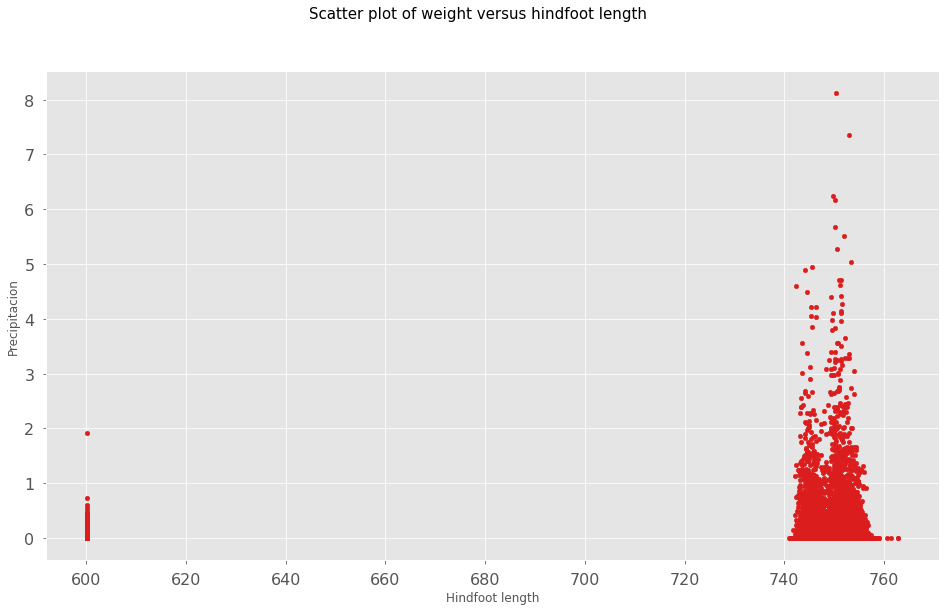

In [27]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("PresionAtmosferica", "Precipitacion", color='#DC1D1D', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

### Presión Atmosferica

#### Temperatura

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

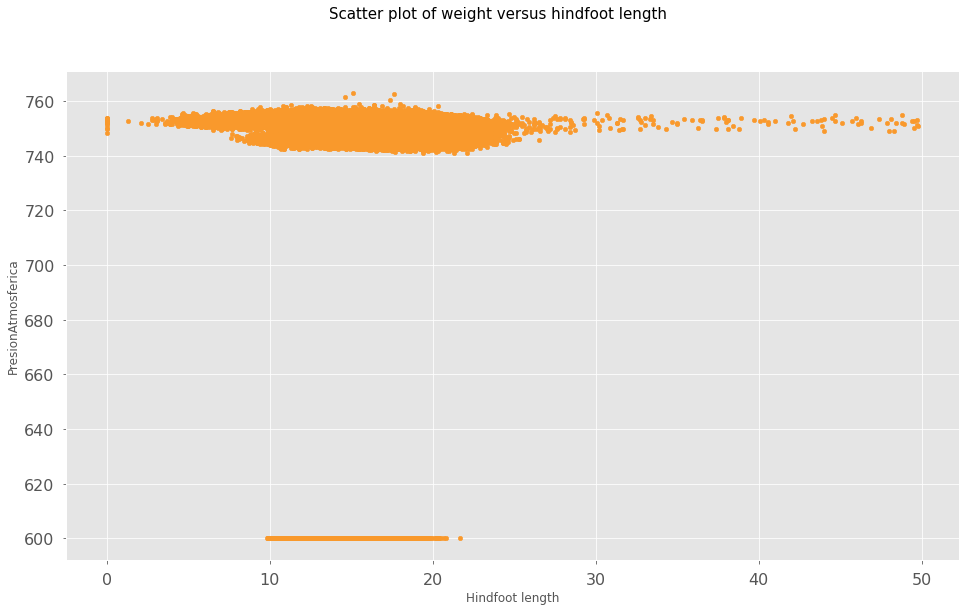

In [28]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Temperatura", "PresionAtmosferica", color='#F9992C', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Humedad

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

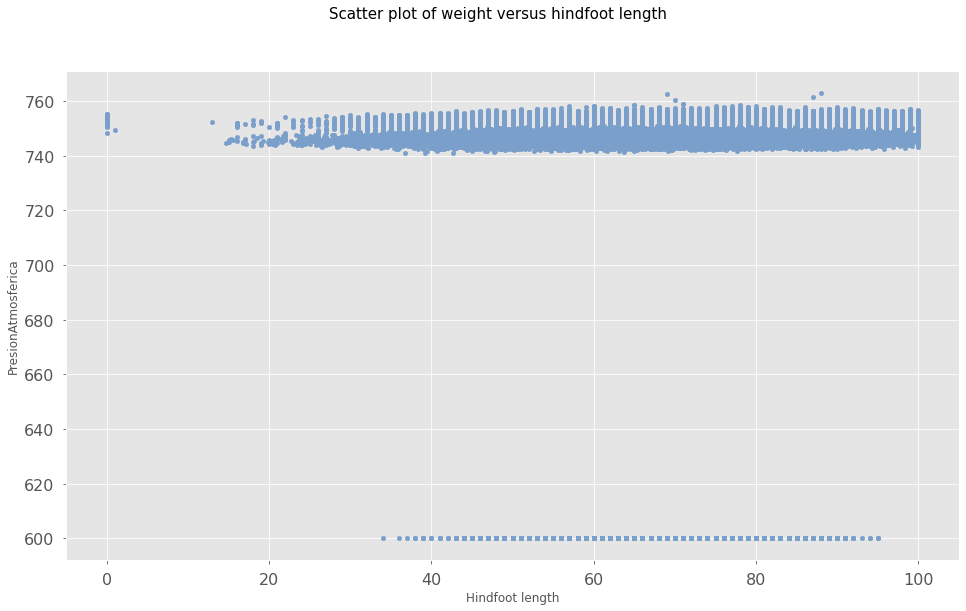

In [29]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Humedad", "PresionAtmosferica", color='#799FCA', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

#### Precipitación

Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

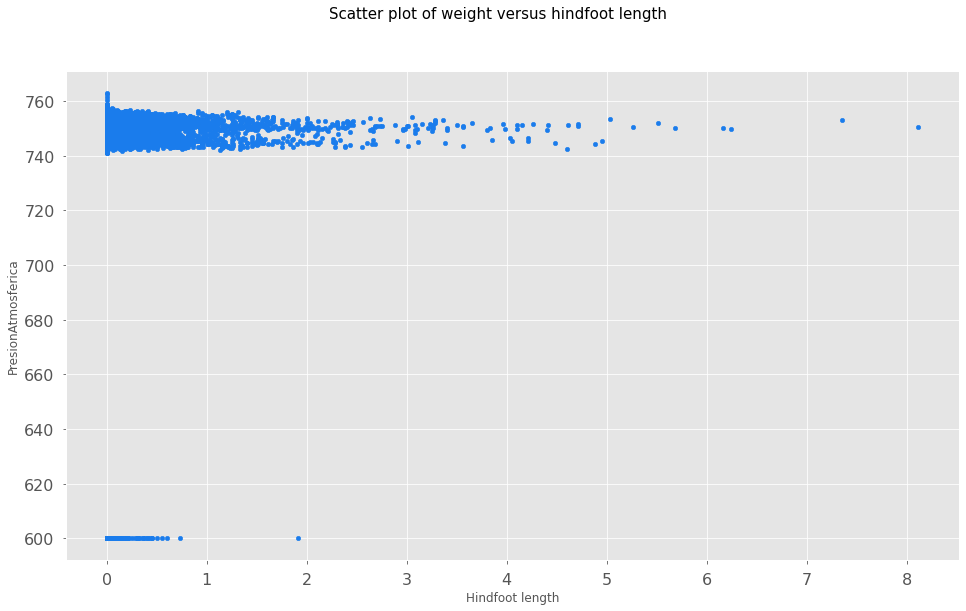

In [30]:
import seaborn as sns

fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df.plot("Precipitacion", "PresionAtmosferica", color='#1A7CEC', kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

## Diagrama de matriz de correlaciones

In [31]:
import seaborn as sns

In [32]:
contamina_cor=df.corr(method='spearman')
contamina_cor

,CodigoEstacion,CodigoSensor,Mes,Anio,Dia,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
CodigoEstacion,1.000000,NaN,-0.010643,0.001768,-0.010361,-0.003132,-0.154358,-0.004123,-0.754538,-0.030373,-0.611196,0.611196
CodigoSensor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes,-0.010643,NaN,1.000000,-0.028949,0.996493,-0.002463,0.010981,-0.013272,0.016124,-0.022821,0.041985,-0.041985
Anio,0.001768,NaN,-0.028949,1.000000,-0.028537,-0.008676,0.153466,0.016869,0.169729,-0.062134,0.290513,-0.290513
Dia,-0.010361,NaN,0.996493,-0.028537,1.000000,-0.002457,0.011882,-0.012955,0.015532,-0.023135,0.042075,-0.042075
Hora,-0.003132,NaN,-0.002463,-0.008676,-0.002457,1.000000,-0.243172,0.023074,-0.048054,0.356830,-0.000789,0.000789
Humedad,-0.154358,NaN,0.010981,0.153466,0.011882,-0.243172,1.000000,0.208033,0.307420,-0.809464,0.304995,-0.304995
Precipitacion,-0.004123,NaN,-0.013272,0.016869,-0.012955,0.023074,0.208033,1.000000,-0.008494,-0.070769,-0.019623,0.019623
PresionAtmosferica,-0.754538,NaN,0.016124,0.169729,0.015532,-0.048054,0.307420,-0.008494,1.000000,-0.184583,0.747638,-0.747638
Temperatura,-0.030373,NaN,-0.022821,-0.062134,-0.023135,0.356830,-0.809464,-0.070769,-0.184583,1.000000,-0.099016,0.099016


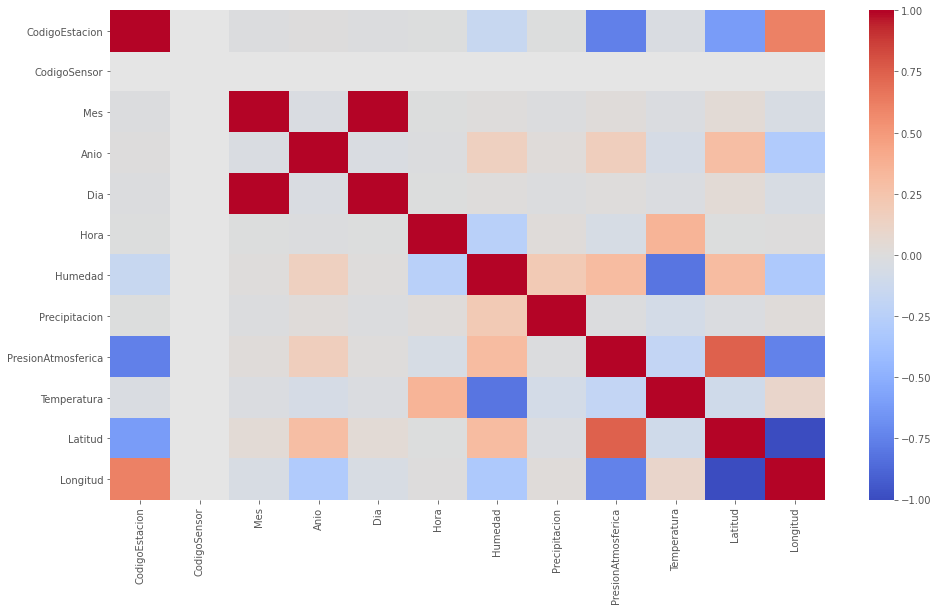

In [33]:
sns.heatmap(contamina_cor,
            xticklabels=contamina_cor.columns,
            yticklabels=contamina_cor.columns,
            cmap='coolwarm')

In [34]:
from funpymodeling.exploratory import corr_pair

In [35]:
res=corr_pair(df)

In [36]:
res.head()

,v1,v2,R,R2
1,CodigoSensor,CodigoEstacion,NaN,NaN
2,Mes,CodigoEstacion,-0.016393,0.000269
3,Anio,CodigoEstacion,-0.045939,0.002110
4,Dia,CodigoEstacion,-0.016391,0.000269
5,Hora,CodigoEstacion,-0.002645,0.000007


In [37]:
 # Variables con correlacion
 res_target_ordered=res[res['v2']=='Temperatura'].sort_values('R2',ascending=False)
 res_target_ordered

,v1,v2,R,R2
114,Humedad,Temperatura,-0.779757,0.608021
113,Hora,Temperatura,0.319585,0.102135
118,Latitud,Temperatura,-0.082787,0.006854
119,Longitud,Temperatura,0.072448,0.005249
111,Anio,Temperatura,-0.055581,0.003089
108,CodigoEstacion,Temperatura,-0.024231,0.000587
116,PresionAtmosferica,Temperatura,-0.021378,0.000457
112,Dia,Temperatura,-0.014721,0.000217
110,Mes,Temperatura,-0.014485,0.000210
115,Precipitacion,Temperatura,-0.007019,0.000049


In [38]:
#Top variables con mas correlacion
top_variables=res_target_ordered[0:3]['v1']
top_variables

114    Humedad
113       Hora
118    Latitud
Name: v1, dtype: object

In [39]:
#Variables con menos correlacion
less_variables=res_target_ordered[res_target_ordered['R2']<0.05]['v1']
less_variables

118               Latitud
119              Longitud
111                  Anio
108        CodigoEstacion
116    PresionAtmosferica
112                   Dia
110                   Mes
115         Precipitacion
Name: v1, dtype: object

# Creación de Dataframe para el modelo de Machine Learning

Inicialmente se dividira en dos Dataframe, uno para realizar el entrenamiento de los modelos y el otro para las pruebas de los resultados.

En segundo lugar, se prepara el Dataframe con las columnas necesarias para realizar los entrenamientos.




In [40]:
# El primero sera desde el 01 de enero del 2015 hasta el 31 de agosto del 2022
# Este servira para el entrenamiento de los modelos.
dfATrabajar=df[df["Fecha"]<='2022-08-31']

# El segundo sera desde el 01 de septiembre del 2022 hasta el 31 de septiembre del 2022
# Este servira para realizar las pruebas de los modelos.
dfPruebas=df[df["Fecha"]>'2022-08-31']

Preparación del Dataframe para entrenar

In [41]:
dfAAnalisar=dfATrabajar[['CodigoEstacion',	'CodigoSensor', 'FechaObservacion', 
                         'Dia', 'Mes', 'Anio',	'Hora',	'Humedad',
                         'Precipitacion', 'PresionAtmosferica', 'Temperatura',
                         'Latitud',	'Longitud']]

In [42]:
dfAAnalisar

,CodigoEstacion,CodigoSensor,FechaObservacion,Dia,Mes,Anio,Hora,Humedad,Precipitacion,PresionAtmosferica,Temperatura,Latitud,Longitud
37735,21205012,27,1/1/2015 0:00,1,1,2015,0,91.0,0.0,754.3,8.4,4.638083,-74.089083
88203,21206960,27,1/1/2015 0:00,1,1,2015,0,67.0,0.0,746.6,11.2,4.600000,-74.066667
88213,21206960,27,1/1/2015 10:00,1,1,2015,10,31.0,0.0,747.1,17.2,4.600000,-74.066667
37745,21205012,27,1/1/2015 10:00,1,1,2015,10,41.0,0.0,751.9,17.8,4.638083,-74.089083
88214,21206960,27,1/1/2015 11:00,1,1,2015,11,36.0,0.0,746.5,18.2,4.600000,-74.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143242,21206960,27,9/9/2021 8:00,252,9,2021,8,69.6,0.0,748.3,13.5,4.600000,-74.066667
37695,21205710,27,9/9/2021 8:00,252,9,2021,8,81.0,0.0,754.4,14.2,4.669333,-74.102667
143243,21206960,27,9/9/2021 9:00,252,9,2021,9,65.9,0.0,748.7,14.4,4.600000,-74.066667
37696,21205710,27,9/9/2021 9:00,252,9,2021,9,74.0,0.0,754.9,15.1,4.669333,-74.102667


# Modelos de Machine Learning


In [43]:
# Importación de librerias necesarias para modelo de Regresión Lineal Multiple
# ========================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# ========================================================

In [44]:
# Creación de variables por separado donde contendran una representación Numpy del DataFrame.
cod=dfAAnalisar['CodigoEstacion'].values
fechaCompleta=dfAAnalisar['FechaObservacion'].values
fechaDia=dfAAnalisar['Dia'].values
fechaMes=dfAAnalisar['Mes'].values
fechaAnio=dfAAnalisar['Anio'].values
fechaHora=dfAAnalisar['Hora'].values
humedad=dfAAnalisar['Humedad'].values
precipitacion=dfAAnalisar['Precipitacion'].values
presionAtmosferica=dfAAnalisar['PresionAtmosferica'].values
temperatura=dfAAnalisar['Temperatura'].values

### Primer modelo de Machine Learning (Regresión Multiple)


In [45]:
# Entrenamiento del modelo con las variables previamente escogidas.

# Arreglo que contentra todas las caracteristicas de X
X=np.array([humedad,fechaHora]).T

# Variable a predecir
Y=np.array([temperatura]).T

#### Modelo de Machine Learning (Regresión Multiple)


In [46]:
# Regresión con variables
reg=LinearRegression()

# Se realiza el ajuste al modelo
reg=reg.fit(X,Y)

# Predicción con respecto a los valores encontrados en X
Y_pred=reg.predict(X)

#### Evaluación del modelo


In [47]:
# Variables obtenidas despues de entrenar el modelo
# Error cuadrático medio del modelo, se realiza con el valor de Y y el valor de Y obtenido del modelo.
error=np.sqrt(mean_squared_error(Y,Y_pred))

# Coeficiente de determinación, es un estadístico usado en el contexto de un modelo 
# estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis.
# Entre mas cercano a 1 este, mejor sera el resultado.
r2=reg.score(X,Y)

In [48]:
print("El error es de: ", error)
print("Valor de r^2: ", r2)
print("Los coeficientes son: ", reg.coef_)

El error es de:  1.9967478774852339
Valor de r^2:  0.6267603483539089
Los coeficientes son:  [[-0.15095708  0.06863954]]


In [49]:
# Inicialización del Dataframe que contendra los resultados.
dfFinalPruebas= pd.DataFrame(columns = ['NombreEstacion','CodigoEstacion','FechaCompleta','Fecha','Hora','Temperatura_Simulada_Regression','Temperatura_Simulada_KNN','Temperatura_Simulada_Red_Neuronal','Temperatura_Prueba','Latitud','Longitud','Altitud'])

i=0
for index, row in dfPruebas.iterrows():

        # Se obtienen las variables por registro del Dataframe que contiene los registros de septiembre.
        estacion=row["CodigoEstacion"]
        fechaCompleta=row["FechaObservacion"]
        fecha=row["Fecha"]
        fechaDia=row["Dia"]
        fechaHora=row["Hora"]
        humedad=row["Humedad"]
        precipitacion=row["Precipitacion"]
        presionAtmosferica=row["PresionAtmosferica"]
        temperatura_Prueba=row["Temperatura"]
        latitud=row["Latitud"]
        longitud=row["Longitud"]

        # Se obtiene la temperatura generada por el modelo.
        temperatura_Simulada=reg.predict([[humedad,fechaHora]])
        temperatura_Simulada=temperatura_Simulada[0][0]

        if row['CodigoEstacion']==21206960:
          dfFinalPruebas.loc[i]=['IDEAM BOGOTA  - AUT [21206960]',estacion,fechaCompleta,fecha,fechaHora,temperatura_Simulada,0,0,temperatura_Prueba,latitud,longitud,2.646]
        elif row['CodigoEstacion']==21205012:
          dfFinalPruebas.loc[i]=['UNIVERSIDAD NACIONAL  - AUT [21205012]',estacion,fechaCompleta,fecha,fechaHora,temperatura_Simulada,0,0,temperatura_Prueba,latitud,longitud,2.556]
        else:
          dfFinalPruebas.loc[i]=['JARDIN BOTANICO  - AUT [21205710]',estacion,fechaCompleta,fecha,fechaHora,temperatura_Simulada,0,0,temperatura_Prueba,latitud,longitud,2.552]
        i=i+1
        

#### Evaluación de las temperaturas obtenidas por el modelo de regresión

In [50]:
r2 = r2_score(dfFinalPruebas['Temperatura_Prueba'], dfFinalPruebas['Temperatura_Simulada_Regression']) 

In [51]:
print("El r^2 obtenido despues de las pruebas para el modelo con regresión es de: ", r2)

El r^2 obtenido despues de las pruebas para el modelo con regresión es de:  0.7009241982610481


### *Segundo modelo de Machine Learning (KNN con regresión)*


In [52]:
# Importación de librerias necesarias para modelo KNN
# ========================================================
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# ========================================================

In [53]:
X=dfAAnalisar[['Humedad','Hora']]
Y=dfAAnalisar[['Temperatura']]

#### Modelo de Machine Learning (KNN)


In [54]:
# Entrenamiento del modelo con las variables previamente escogidas.

# Arreglo que contentra todas las caracteristicas del modelo.
# Donde se obtienen los valores de X, Y, el conjunto de datos para entrenamiento y pruebas de cada uno.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=0)

In [55]:
# Busqueda del mejor K para el modelo.
# Se prepara una lista con valores del 1 al 100, se prueban todos estos y se obtiene 
# su error cuadrático medio por cada K
error=[]
for i in range(1, 101, 1):
  clf=KNeighborsRegressor(i)
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  error.append(mean_squared_error(Y_test,Y_pred))

In [56]:
# Obtención del mejor k, se busca el que de el menor error
minimo=min(error)
i_min = error.index(minimo)
knn=i_min+1

In [57]:
# Entrenamiento del modelo KNN con regresión
clf=KNeighborsRegressor(knn)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

#### Evaluación del modelo


In [58]:
# error.append(mean_squared_error(Y_test,Y_pred))

In [59]:
r2=reg.score(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [60]:
print("El error es de: ", error)
print("Valor de r^2: ", r2)
print("Los coeficientes son: ", reg.coef_)

El error es de:  [3.8872551325165206, 2.9601383369000307, 2.656485744969389, 2.5699067416456978, 2.481460583684124, 2.4226992255171713, 2.407699957813947, 2.3775150212826004, 2.3686232809956445, 2.3742401265197657, 2.3477524559873575, 2.3453720502891247, 2.3318696724793697, 2.317909004346747, 2.3065549300117323, 2.298573797562496, 2.292902714077714, 2.2863532023192676, 2.2795287790482357, 2.2725848681889804, 2.270155654325633, 2.269300742544191, 2.2648894593549667, 2.26422161854565, 2.2584792388119372, 2.259170628091696, 2.258305372833493, 2.257296982917288, 2.2571805161160174, 2.2562837839391494, 2.254475971050055, 2.2565452062799105, 2.257820862115629, 2.2574866811341745, 2.2567839501023936, 2.2545303679882167, 2.254022905526124, 2.2528921298123623, 2.251552343494876, 2.252162154598688, 2.2511277166825057, 2.2520182404421605, 2.2521991890699127, 2.2508205690532472, 2.253167651493179, 2.2535752497469734, 2.252768413444658, 2.2522006970043336, 2.251586151632393, 2.252656411353856, 2.25

In [61]:
# Se crea una nueva columna con los datos obtenidos por KNN

i=0
for index, row in dfPruebas.iterrows():
  
  dfFinalPruebas['Temperatura_Simulada_KNN'].loc[i]=y_pred[i][0]
  i=i+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Evaluación de las temperaturas obtenidas por el modelo de KNN

In [62]:
r2 = r2_score(dfFinalPruebas['Temperatura_Prueba'], dfFinalPruebas['Temperatura_Simulada_KNN']) 

In [63]:
print("El r^2 obtenido despues de las pruebas para el modelo con KNN es de: ", r2)

El r^2 obtenido despues de las pruebas para el modelo con KNN es de:  -0.8246797369726688


## *Tercer modelo de Machine Learning (Red Neunoral)*

In [64]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor


In [65]:
x=dfAAnalisar['Humedad']
y=dfAAnalisar['Temperatura']

In [66]:
X=x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [67]:
error=[]
i=0
while True:
  if i!=100:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    mlr=MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3,3),
                    random_state=1)
    mlr.fit(X_train,y_train)
    print("Score: ",mlr.score(X_train,y_train))
    error.append(mlr.score(X_train,y_train))
    if mlr.score(X_train,y_train)>0.70:
      error.append(mlr.fit(X_train,y_train))
      break;
    i=i+1
  else:
    break;

Score:  0.6095101358674095
Score:  0.6110436555480798
Score:  0.6032535919898896
Score:  0.6047227082907181
Score:  0.6045705146528497
Score:  0.6068050086778665
Score:  0.0009982848807468248
Score:  0.6070183664570429
Score:  0.606689003702149
Score:  0.6078958549126535
Score:  0.6052654605106466
Score:  0.6036749013326034
Score:  0.001019804986072792
Score:  0.6065622312090194
Score:  0.6087386784891358
Score:  0.0011682539913241419
Score:  0.6050754333155195
Score:  0.6043604751521003
Score:  0.6045107777240069
Score:  0.6100389990364818
Score:  0.6076184360323603
Score:  0.6070400266958433
Score:  0.6089427711496107
Score:  0.6050331404323321
Score:  0.6014407168520107
Score:  0.0009392406952755117
Score:  0.6064357353527837
Score:  0.6074949574217645
Score:  0.6046589396104476
Score:  0.6078082038098549
Score:  0.0011313365806528974
Score:  0.6047365411394928
Score:  0.6047078695673223
Score:  0.6060107938733557
Score:  0.0009038806789646303
Score:  0.6079005421772643
Score:  0.60

In [68]:
# Obtención del mejor score, se busca el que de el menor error
minimo=min(error)
i_min = error.index(minimo)

In [69]:
# Se crea una nueva columna con los datos obtenidos por KNN

i=0
for index, row in dfPruebas.iterrows():
  humedad=row["Humedad"]
  dfFinalPruebas['Temperatura_Simulada_Red_Neuronal'].loc[i]=mlr.predict([[humedad]])[0]
  i=i+1

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

#### Evaluación de las temperaturas obtenidas por el modelo de Red Neuronal

In [70]:
r2 = r2_score(dfFinalPruebas['Temperatura_Prueba'], dfFinalPruebas['Temperatura_Simulada_Red_Neuronal']) 

In [71]:
print("El r^2 obtenido despues de las pruebas para la red neuronal es de: ", r2)
#0.6794433060362942

El r^2 obtenido despues de las pruebas para la red neuronal es de:  0.6792373905068825


# Generación de Dataframe final con valores obtenidos


In [72]:
dfFinalPruebas

,NombreEstacion,CodigoEstacion,FechaCompleta,Fecha,Hora,Temperatura_Simulada_Regression,Temperatura_Simulada_KNN,Temperatura_Simulada_Red_Neuronal,Temperatura_Prueba,Latitud,Longitud,Altitud
0,JARDIN BOTANICO - AUT [21205710],21205710,9/1/2022 0:00,2022-09-01,0,10.472269,15.865909,11.089089,11.8,4.669333,-74.102667,2.552
1,IDEAM BOGOTA - AUT [21206960],21206960,9/1/2022 0:00,2022-09-01,0,12.087510,13.404545,12.777955,12.6,4.600000,-74.066667,2.646
2,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/1/2022 0:00,2022-09-01,0,10.774183,12.45,11.404765,13.0,4.638083,-74.089083,2.556
3,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/1/2022 1:00,2022-09-01,1,11.295694,18.654545,11.878278,12.7,4.638083,-74.089083,2.556
4,IDEAM BOGOTA - AUT [21206960],21206960,9/1/2022 1:00,2022-09-01,1,11.673087,11.036364,12.272873,12.6,4.600000,-74.066667,2.646
...,...,...,...,...,...,...,...,...,...,...,...,...
1536,JARDIN BOTANICO - AUT [21205710],21205710,9/9/2022 8:00,2022-09-09,8,14.644355,17.222727,14.877199,14.1,4.669333,-74.102667,2.552
1537,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/9/2022 8:00,2022-09-09,8,14.493398,12.070455,14.719361,13.8,4.638083,-74.089083,2.556
1538,JARDIN BOTANICO - AUT [21205710],21205710,9/9/2022 9:00,2022-09-09,9,15.769694,19.077273,15.982065,15.6,4.669333,-74.102667,2.552
1539,UNIVERSIDAD NACIONAL - AUT [21205012],21205012,9/9/2022 9:00,2022-09-09,9,15.014909,15.425,15.192875,15.3,4.638083,-74.089083,2.556


In [73]:
dfFinalPruebas['Fecha'] = pd.to_datetime(dfFinalPruebas['Fecha'], format="%Y/%m/%d")
dfFinalPruebas=dfFinalPruebas.sort_values(['Fecha', 'Hora'])

# Obtención de las diferencias entre las temperaturas obtenidas por cada modelo.
dfFinalPruebas['Diferencia_Regression']=dfFinalPruebas['Temperatura_Simulada_Regression']-dfFinalPruebas['Temperatura_Prueba']
dfFinalPruebas['Diferencia_KNN']=dfFinalPruebas['Temperatura_Simulada_KNN']-dfFinalPruebas['Temperatura_Prueba']
dfFinalPruebas['Diferencia_Red_Neuronal']=dfFinalPruebas['Temperatura_Simulada_Red_Neuronal']-dfFinalPruebas['Temperatura_Prueba']

# Promedio de error por modelo realizado.
print("Promedio de diferencia con Regresión", dfFinalPruebas['Diferencia_Regression'].mean())
print("Promedio de diferencia con KNN", dfFinalPruebas['Diferencia_KNN'].mean())
print("Promedio de diferencia con Red Neuronal", dfFinalPruebas['Diferencia_Red_Neuronal'].mean())

Promedio de diferencia con Regresión 0.5239545516434971
Promedio de diferencia con KNN 1.0521576898118083
Promedio de diferencia con Red Neuronal 0.5751162653873946


In [74]:
# Exportación de Dataframe final

# Variables
# path_almacenar: Donde va a querer almacenar el Dataframe obtenido
path_almacenar='/content/drive/MyDrive/Codigo_Final/DataPrueba_Machine_Learning.csv'
dfFinalPruebas.to_csv(path_almacenar)

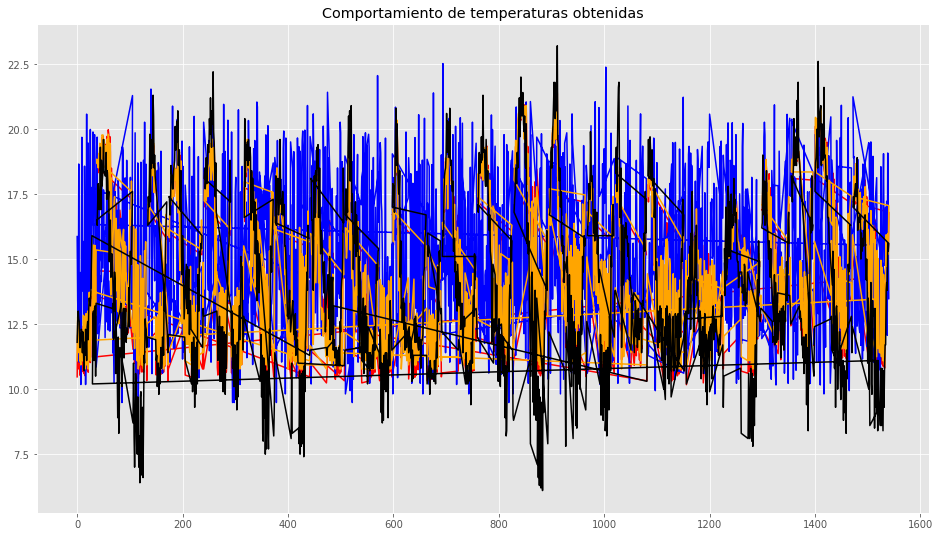

In [75]:
#dfFinalPruebas[['FechaCompleta','Temperatura_Simulada_Regression','Temperatura_Simulada_KNN','Temperatura_Simulada_Red_Neuronal','Temperatura_Prueba']].plot() 
ax = plt.gca() 
  
dfFinalPruebas['Temperatura_Simulada_Regression'].plot( x = 'FechaCompleta' , y = 'Temperatura_Simulada_Regression', ax = ax, color='red', title = 'Comportamiento de temperaturas obtenidas') 
dfFinalPruebas['Temperatura_Simulada_KNN'].plot( x = 'FechaCompleta' , y = 'Temperatura_Simulada_KNN' , ax = ax, color='blue' ) 
dfFinalPruebas['Temperatura_Simulada_Red_Neuronal'].plot( x = 'FechaCompleta' , y = 'Temperatura_Simulada_Red_Neuronal' , ax = ax, color='orange' ) 
dfFinalPruebas['Temperatura_Prueba'].plot( x = 'FechaCompleta' , y = 'Temperatura_Prueba' , ax = ax, color='black' ) 